## <u>Predicting Fraud Transations using ML models</u>

In [1]:
#importing all required libraries for project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   

In [2]:
#loading dataset using pandas and querying header
df1 = pd.read_excel("CreditCardData.xlsx")
df1.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,2020-10-13,23,MasterCard,Tap,17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,2020-10-14,21,Visa,Tap,28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,2020-10-13,19,Visa,Tap,8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,2020-10-14,9,MasterCard,PIN,186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,2020-10-13,22,Visa,PIN,86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


In [4]:
#checking if any cells in the dataframe are missing
df1.notnull().sum()

Transaction ID            100000
Date                      100000
Time                      100000
Type of Card              100000
Entry Mode                100000
Amount                    100000
Type of Transaction       100000
Merchant Group            100000
Country of Transaction    100000
Shipping Address          100000
Country of Residence      100000
Gender                    100000
Age                       100000
Bank                      100000
Fraud                     100000
dtype: int64

In [5]:
#querying the dataframe for info on the type of data under each feature
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction ID          100000 non-null  object        
 1   Date                    100000 non-null  datetime64[ns]
 2   Time                    100000 non-null  int64         
 3   Type of Card            100000 non-null  object        
 4   Entry Mode              100000 non-null  object        
 5   Amount                  100000 non-null  int64         
 6   Type of Transaction     100000 non-null  object        
 7   Merchant Group          100000 non-null  object        
 8   Country of Transaction  100000 non-null  object        
 9   Shipping Address        100000 non-null  object        
 10  Country of Residence    100000 non-null  object        
 11  Gender                  100000 non-null  object        
 12  Age                     100000 

In [6]:
# calculation for the percentage of fraud transactions relative to total transactions
fraud = df1['Fraud'].sum()/len(df1)
fraud

0.0719

In [7]:
# counting the unique number of data values within each column

ft = list(df1)
for i in ft:
  j = df1[i].value_counts()
  print("---- %s ----" % i)
  print(j)

---- Transaction ID ----
#2617 708    4
#2777 483    3
#2740 381    3
#2683 383    3
#3201 854    3
            ..
#3284 708    1
#3562 261    1
#2595 002    1
#3176 691    1
#3348 972    1
Name: Transaction ID, Length: 95687, dtype: int64
---- Date ----
2020-10-14    50186
2020-10-13    49814
Name: Date, dtype: int64
---- Time ----
16    5786
23    5757
12    5757
11    5751
7     5720
13    5700
21    5689
15    5688
14    5688
8     5683
17    5669
19    5631
22    5625
10    5610
9     5576
18    5553
20    5522
2      546
3      543
6      526
0      506
5      497
1      495
4      482
Name: Time, dtype: int64
---- Type of Card ----
Visa          53812
MasterCard    46188
Name: Type of Card, dtype: int64
---- Entry Mode ----
PIN    50163
Tap    49837
Name: Entry Mode, dtype: int64
---- Amount ----
17     2153
23     2107
16     2084
28     2078
15     2073
       ... 
124     106
145     105
380     102
375     100
393      99
Name: Amount, Length: 396, dtype: int64
---- Type of 

**Data Preprocessing and EDA**

In [8]:
#displaying some key statistics of the dataframe
transactions = len(df1['Transaction ID'])
nonfraud = len(df1[df1.Fraud == 0])
fraud_count = len(df1[df1.Fraud == 1])
fraudpercent = (fraud_count/transactions)*100

print('Total number of cases: ', transactions)
print('Total number of non-fraud cases: ',nonfraud)
print('Total number of fraud cases: ',fraud_count)
print('Percentage of fraud cases: ',fraudpercent,'%')

Total number of cases:  100000
Total number of non-fraud cases:  92810
Total number of fraud cases:  7190
Percentage of fraud cases:  7.19 %


In [9]:
# counting the total number of fraud transactions associated with each and the percentage as a fraction of total fraud transactions

bar_count = 0
mon_count = 0
rbs_count = 0
met_count = 0
barl_count = 0
hal_count = 0
llo_count = 0
hsbc_count = 0

for i,j in zip(df1['Fraud'],df1['Bank']):
    if j == 'Barclays' and i == 1:
        bar_count += 1
    if j == 'Monzo' and i == 1:
        mon_count += 1
    if j == 'RBS' and i == 1:
        rbs_count += 1
    if j == 'Metro' and i == 1:
        met_count += 1
    if j == 'Barlcays' and i == 1:
        barl_count += 1
    if j == 'Halifax' and i == 1:
        hal_count += 1
    if j == 'Lloyds' and i == 1:
        llo_count += 1
    if j == 'HSBC' and i == 1:
        hsbc_count += 1

print('TOTAL FRAUD TRANSACTIONS ASSOCIATED WITH EACH BANK AND AS PERCENTAGE OF TOTAL FRAUD CASES')
print('-----------------------------------------------------------------------------------------')
print('Barclays fraud cases: ', bar_count, '(', round(((bar_count/fraud_count)*100),2) ,'%)')
print('Monzo fraud cases: ', mon_count, '(', round((mon_count/fraud_count)*100,2) ,'%)')
print('RBS fraud cases: ', rbs_count, '(', round((rbs_count/fraud_count)*100,2) ,'%)')
print('Metro fraud cases: ', met_count, '(', round((met_count/fraud_count)*100,2) ,'%)')
print('Barlcays fraud cases: ', barl_count, '(', round((barl_count/fraud_count)*100,2) ,'%)')
print('Halifax fraud cases: ', hal_count, '(', round((hal_count/fraud_count)*100,2) ,'%)')
print('Lloyds fraud cases: ', llo_count, '(', round((llo_count/fraud_count)*100,2) ,'%)')
print('HSBC fraud cases: ', hsbc_count, '(', round((hsbc_count/fraud_count)*100,2) ,'%)')

TOTAL FRAUD TRANSACTIONS ASSOCIATED WITH EACH BANK AND AS PERCENTAGE OF TOTAL FRAUD CASES
-----------------------------------------------------------------------------------------
Barclays fraud cases:  2291 ( 31.86 %)
Monzo fraud cases:  728 ( 10.13 %)
RBS fraud cases:  652 ( 9.07 %)
Metro fraud cases:  804 ( 11.18 %)
Barlcays fraud cases:  690 ( 9.6 %)
Halifax fraud cases:  680 ( 9.46 %)
Lloyds fraud cases:  693 ( 9.64 %)
HSBC fraud cases:  652 ( 9.07 %)


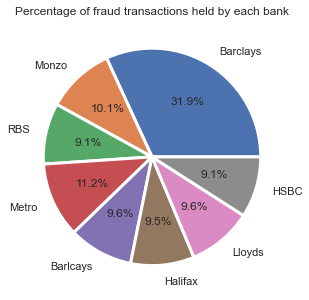

In [305]:
# plotting a pie chart showing the proportion of total fraud transactions held by each bank
plt.rcParams["figure.figsize"] = (20,5)
names = 'Barclays','Monzo','RBS','Metro','Barlcays','Halifax','Lloyds','HSBC'
values=[bar_count,mon_count,rbs_count,met_count,barl_count,hal_count,llo_count,hsbc_count]
 
plt.pie(values, labels = names,autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.title('Percentage of fraud transactions held by each bank')
plt.show();

In [11]:
#counting percentage of fraud transactions relative to total individual bank transactions
banknames = ['Barclays','Monzo','RBS','Metro','Barlcays','Halifax','Lloyds','HSBC']
banktickers = ['bar','mon','rbs','met','barl','hal','llo','hsbc']

bar_tot = 0
mon_tot = 0
rbs_tot = 0
met_tot = 0
barl_tot = 0
hal_tot = 0
llo_tot = 0
hsbc_tot = 0

for i in df1['Bank']:
    if i == banknames[0]:
        bar_tot += 1
    if i == banknames[1]:
        mon_tot += 1
    if i == banknames[2]:
        rbs_tot += 1
    if i == banknames[3]:
        met_tot += 1
    if i == banknames[4]:
        barl_tot += 1
    if i == banknames[5]:
        hal_tot += 1
    if i == banknames[6]:
        llo_tot += 1
    if i == banknames[7]:
        hsbc_tot += 1 
    
bar_per_fraud = round((bar_count/bar_tot)*100,2)
mon_per_fraud = round((mon_count/mon_tot)*100,2) 
rbs_per_fraud = round((rbs_count/rbs_tot)*100,2) 
met_per_fraud = round((met_count/met_tot)*100,2) 
barl_per_fraud = round((barl_count/barl_tot)*100,2) 
hal_per_fraud = round((hal_count/hal_tot)*100,2) 
llo_per_fraud = round((llo_count/llo_tot)*100,2) 
hsbc_per_fraud = round((hsbc_count/hsbc_tot)*100,2) 

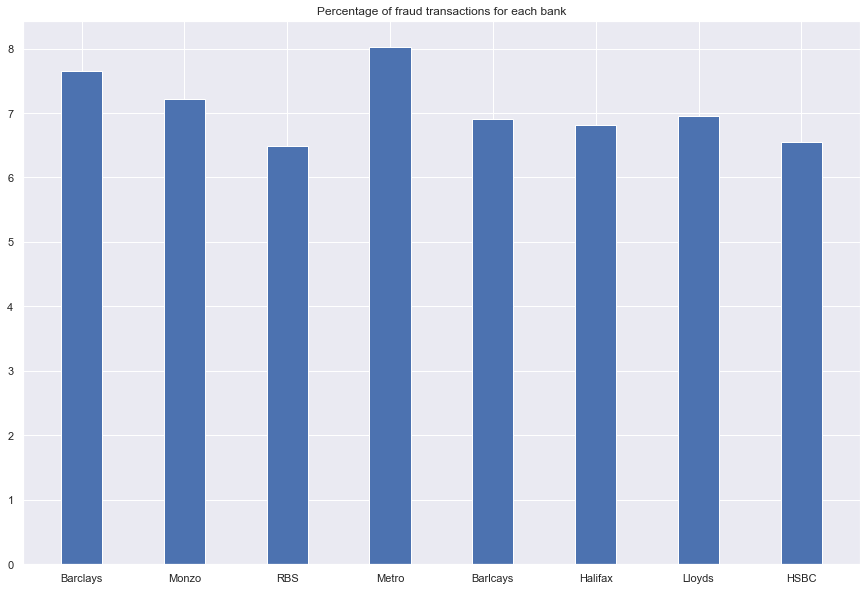

In [306]:
#plotting the percentage of fraud transactions for each bank
xlabels=['Barclays', 'Monzo', 'RBS', 'Metro', 'Barlcays', 'Halifax', 'Lloyds', 'HSBC'] # x variables
ylabels=[bar_per_fraud, mon_per_fraud, rbs_per_fraud, met_per_fraud, barl_per_fraud, hal_per_fraud, llo_per_fraud, hsbc_per_fraud] # y variables

plt.subplots(figsize=(15,10))
plt.bar(xlabels,ylabels,width=0.4)
plt.title('Percentage of fraud transactions for each bank')
plt.show()

From the bar chart above, it is evident that there is no single bank with a significantly greater number of fraudulent transactions than the other banks. Additionally, transactions under the name 'Barlcays' show no major deviation from the other banks despite the illegitimacy of the name of the bank. Therefore, transactions under 'Barlcays' will be converted to 'Barclays' transactions under the assumption that a spelling mistake was made in data entry.

In [203]:
#assigning 'Barlcays' values to 'Barclays'
dfrep = df1.replace('Barlcays','Barclays')
dfrep['Bank'].value_counts()

Barclays    39927
Monzo       10103
RBS         10046
Metro       10014
Halifax      9988
Lloyds       9966
HSBC         9956
Name: Bank, dtype: int64

In [83]:
# dropping fraud and assigning altered dataframe to object to prepare for heat map plot
corrdata = dfencode.drop(['Fraud'], axis = 1)

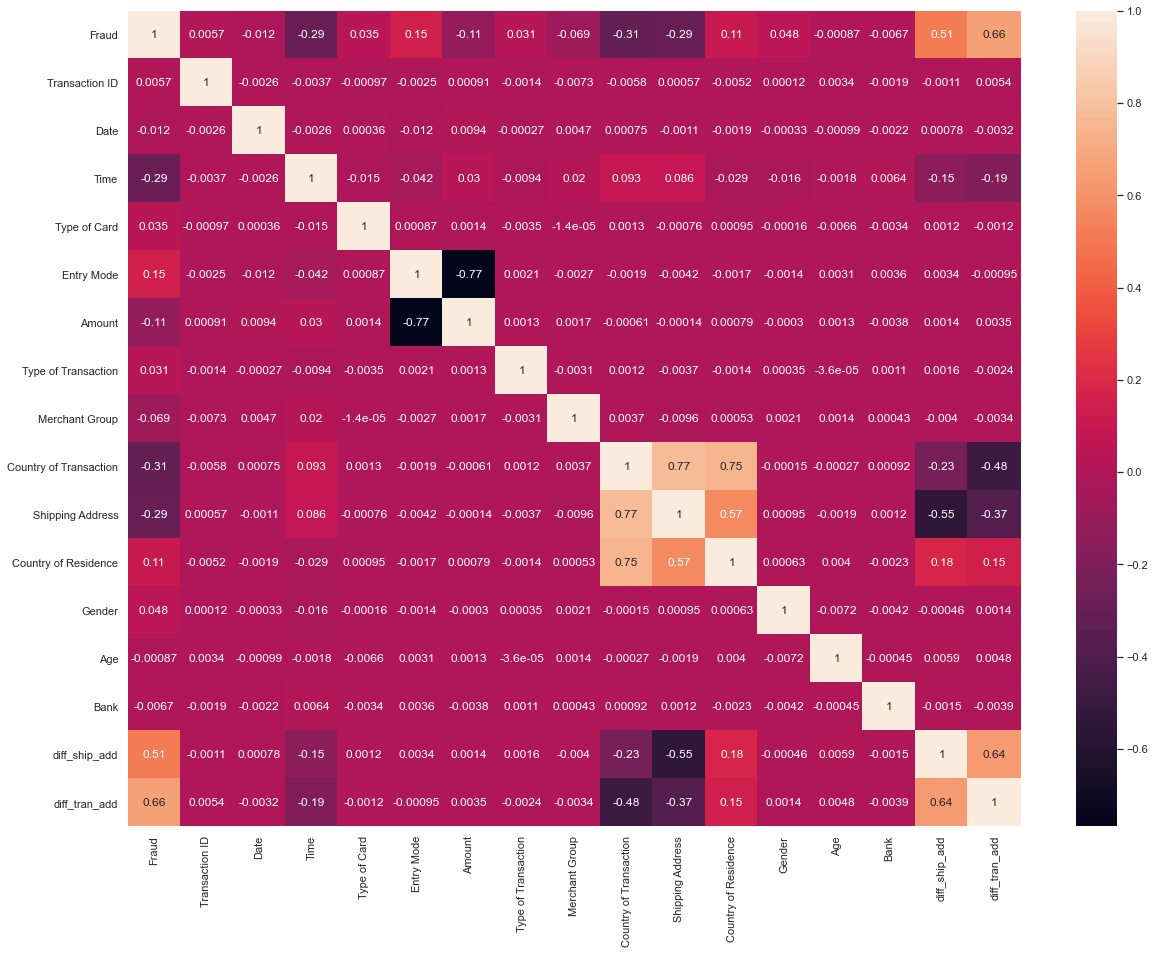

In [214]:
#plottting a heat map to show the correlation of fraud to other feature variables
correlation = pd.concat([dfencode['Fraud'],corrdata], axis=1).corr()
plt.subplots(figsize=(20,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)
plt.show()

The diagram above maps the correlation between a fraudulent transaction with all the other feature variables. Larger values are indicative of stronger correlations (regardless of the sign). This diagram assists in identifying key features of interst and based on the relationships shown, further EDA will be conducted on the following features:
1. Time: Fraud and time seem to show a relatively strong relationship compared to the other feature variables
2. Entry mode: Although weaker than time, this could be indicative of fraud
3. Amount: This may range a lot, however, could be a useful indicator of a trend in the fraudulent transactions
4. Location: Differing shipping and transaction addresses from the country of residence seem to show a significant correlation with fraud

In this instance, features with a correlation to fraud of > 0.1 (regardless of sign) will be explored further.

### Time

In [64]:
# grouping time and fraud to gain a visual understanding of the data in the table display below
timeanalysis = df1.groupby(['Time','Fraud'])
timeanalysis.agg(['count'])

,,Transaction ID,Date,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,diff_ship_add,diff_tran_add
,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Time,Fraud,,,,,,,,,,,,,,,
0,1,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
1,1,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495
2,1,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546
3,1,543,543,543,543,543,543,543,543,543,543,543,543,543,543,543
4,1,482,482,482,482,482,482,482,482,482,482,482,482,482,482,482
5,1,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497
6,1,526,526,526,526,526,526,526,526,526,526,526,526,526,526,526
7,0,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509,5509


In [71]:
# assigning a dataframe with only fraud transactions with adjacent time values to an object
dffrauddrop = df1[df1['Fraud'] !=0].reset_index(drop=True)
df2 = dffrauddrop[['Time','Fraud']]
df2

,Time,Fraud
0,11,1
1,6,1
2,12,1
3,18,1
4,1,1
...,...,...
7185,5,1
7186,19,1
7187,2,1
7188,4,1


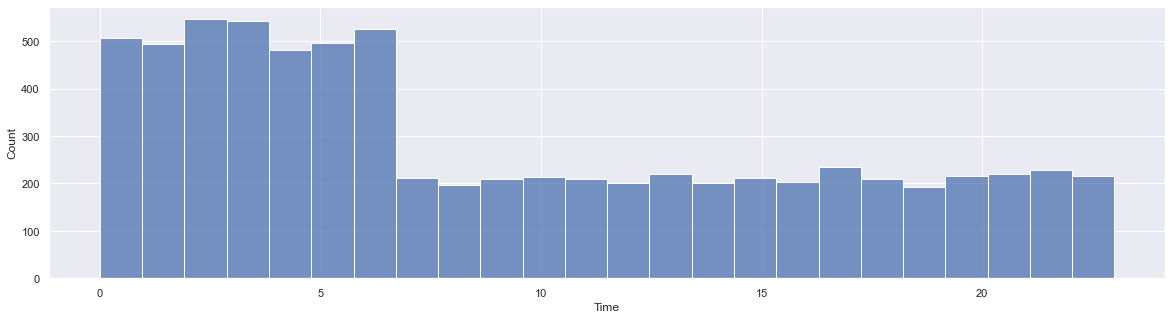

In [215]:
# plotting a histogram of time against the number of fraud cases during that hour
sns.set(style="darkgrid")
sns.histplot(data=df2, x=df2["Time"],bins = 24)
plt.show()

The histogram above shows the fraud count at each hour of the day. It is evident that fraudulent transactions are most prominent between the hours of 00:00-07:00. This explains the correlation observed between fraud and time.

### Entry Mode

In [91]:
# assigning a dataframe with only fraud transactions with adjacent entry mode value to an object
dfem = dffrauddrop[['Entry Mode','Fraud']]
dfem # tap = 1, PIN = 0

,Entry Mode,Fraud
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1
...,...,...
7185,1,1
7186,1,1
7187,1,1
7188,1,1


In [97]:
# counting the number of time PIN and tap were used as entry mode methods in fraud transactions
PINc = 0
tapc = 0

for i in dfem['Entry Mode']:
    if i == 0:
        PINc += 1
    else:
        tapc += 1

Number of fraudulent transactions by entry mode
PIN: 1639
Tap: 5551


PIN: 1639
Tap: 5551


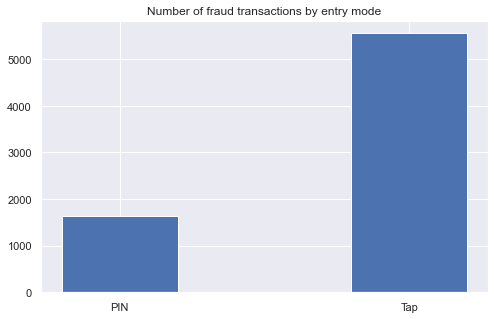

In [98]:
#plotting a bar graph to show the number of fraud transactions that used tap vs PIN 
xem = ['PIN','Tap']
yem = [PINc, tapc]

plt.subplots(figsize=(8,5))
plt.bar(xem,yem,width=0.4)
plt.title('Number of fraud transactions by entry mode')
print('PIN:',PINc)
print('Tap:',tapc)

The bar chart above indicated that fraudulent transactions are typically carried out via tap for payment.

### Amount

In [100]:
# assigning a dataframe with only fraud transactions with adjacent amount values to an object
dfam = dffrauddrop[['Amount','Fraud']]
dfam

,Amount,Fraud
0,124,1
1,0,1
2,331,1
3,11,1
4,21,1
...,...,...
7185,12,1
7186,14,1
7187,7,1
7188,9,1


In [165]:
dfam.describe() # statistics of amounts associated with fraud transactions

,Amount,Fraud
count,7190.000000,7190.0
mean,58.744228,1.0
std,103.450414,0.0
min,0.000000,1.0
25%,8.000000,1.0
50%,16.000000,1.0
75%,24.000000,1.0
max,395.000000,1.0


In [133]:
dffrauddrop2 = df1[df1['Fraud'] !=1].reset_index(drop=True)
dfam2 = dffrauddrop2[['Amount','Fraud']]
dfam2.describe() # statistics of amounts associated with non-fraud transactions

,Amount,Fraud
count,92810.000000,92810.0
mean,111.348745,0.0
std,124.043892,0.0
min,0.000000,0.0
25%,13.000000,0.0
50%,27.000000,0.0
75%,210.000000,0.0
max,395.000000,0.0


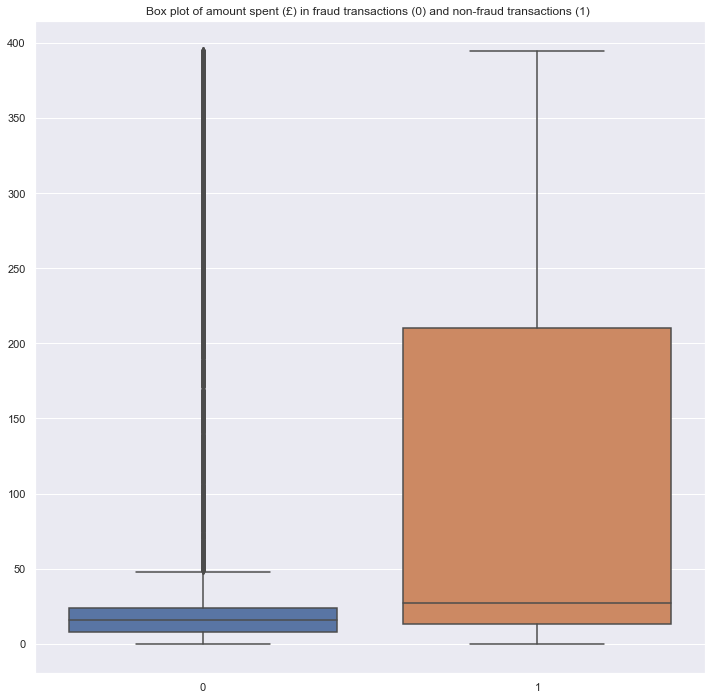

In [208]:
#plotting a boxplot to show the distrubution of amounts in fraud transactions vs non fraud transactions
sns.set(style="darkgrid")
plt.subplots(figsize=(12,12))
sns.boxplot(data=[dfam.drop(['Fraud'],axis=1),dfam2.drop(['Fraud'],axis=1)])
plt.title('Box plot of amount spent (£) in fraud transactions (0) and non-fraud transactions (1) ')

plt.show()

The boxplot above suggests that fraud transactions are typically in the lower quartile range when compared to normal transactions. However, the maximum value of both plots is the same at £395, this can be classified as an outlier in the fraudulent transactions dataset. 

### Location

In [190]:
# querying encoded dataframe to determine assignments of country to numbers by encoder
df1.head(13)

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,diff_ship_add,diff_tran_add
0,0,0,23,0,1,12,1,7,4,2,4,0,15,0,0,1,0
1,1,1,21,1,1,23,1,5,4,4,4,1,20,7,0,0,0
2,2,0,19,1,1,3,1,9,4,4,4,1,11,0,0,0,0
3,3,1,9,0,0,181,0,2,4,4,4,0,44,0,0,0,0
4,4,0,22,1,0,81,1,0,4,4,4,0,40,6,0,0,0
5,5,0,18,0,0,19,0,3,4,3,4,0,46,0,0,1,0
6,6,0,11,1,0,124,1,1,1,1,4,0,0,4,1,1,1
7,7,1,20,0,1,7,2,2,4,2,4,1,27,1,0,1,0
8,8,0,8,1,0,148,0,8,1,1,4,1,32,3,0,1,1
9,9,0,20,1,0,290,2,0,4,4,4,0,57,7,0,0,0


China fraud counts: 1510
India fraud counts: 1575
Russia fraud counts: 1481
USA fraud counts: 1559
UK fraud counts: 1065


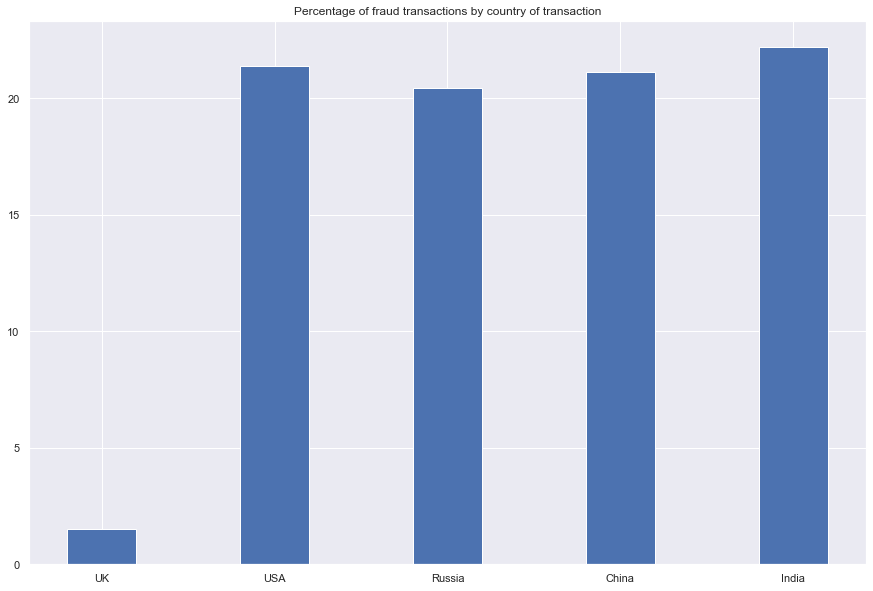

In [211]:
#assigning the following 2 dataframes to an object:
#1 dataframe of non fraud transactions with location parameters
#2 dataframe of fraud transactions with locations parameters

dflocnf = dffrauddrop2[['Country of Transaction','Shipping Address','Country of Residence','diff_ship_add','diff_tran_add','Fraud']]
dflocfr =  dffrauddrop[['Country of Transaction','Shipping Address','Country of Residence','diff_ship_add','diff_tran_add','Fraud']]

#0 = China
#1 = India
#2 = Russia
#3 = USA
#4 = UK

chinac = 0
indiac = 0
russiac = 0
usac = 0
ukc = 0

#counting the number of fraud transactions associated with each country of transaction

for i in dflocfr['Country of Transaction']:
    if i == 0:
        chinac += 1
    elif i == 1:
        indiac +=1
    elif i == 2:
        russiac+=1
    elif i == 3:
        usac +=1
    elif i == 4:
        ukc += 1
        
print('China fraud counts:',chinac)
print('India fraud counts:',indiac)
print('Russia fraud counts:',russiac)
print('USA fraud counts:',usac)
print('UK fraud counts:',ukc)

#total number of transactions from each country

uktot = 71200
usatot = 7298
russiatot = 7257
chinatot = 7152
indiatot = 7093

#plotting a bar graph to show percentage of fraud transactions by country of transaction

xcountries = ['UK','USA','Russia','China','India']
ycountries = [(ukc/uktot)*100,(usac/usatot)*100,(russiac/russiatot)*100,(chinac/chinatot)*100,(indiac/indiatot)*100]

plt.subplots(figsize=(15,10))
plt.bar(xcountries,ycountries,width=0.4)
plt.title('Percentage of fraud transactions by country of transaction')
plt.show()

The bar chart above indicates that any transaction outside of the UK has approximately a 20% chance of being a fraudulent transaction. This also explains the high correlation between the fraud and the different shipping/transaction addresses from the residence address. Furthermore, since the UK has the highest number of transactions, it confirms that the fraudulent activity is likely to arise from outside the UK.

In [311]:
# normalising age and amount feature variables between 0 and 1

dfencode['Amount'] = (dfencode['Amount'] - dfencode['Amount'].min())/(dfencode['Amount'].max() - dfencode['Amount'].min())
dfencode['Age'] = (dfencode['Age'] -dfencode['Age'].min()) / (dfencode['Age'].max() - dfencode['Age'].min())

In [309]:
# encoding the dataframe to convert all strings to integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfencode = df1

for i in ft:
    dfencode[i] = le.fit_transform(dfencode[i])

In [288]:
# identifying transactions with different shipping addresses and country of transactions than country of residence
# adding columns to the dataframe to reflect these differences as booleans

dfencode['diff_ship_add'] = dfencode['Country of Residence'] - dfencode['Shipping Address']
dfencode['diff_tran_add'] = dfencode['Country of Residence'] - dfencode['Country of Transaction']

dfencode['diff_ship_add'] = dfencode['diff_ship_add'].astype(bool).astype(int) 
dfencode['diff_tran_add'] = dfencode['diff_tran_add'].astype(bool).astype(int) 

In [312]:
#querying encoded head
dfencode.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,diff_ship_add,diff_tran_add
0,0,0,23,0,1,0.030380,1,7,4,2,4,0,0.234375,0,0,1,0
1,1,1,21,1,1,0.058228,1,5,4,4,4,1,0.312500,7,0,0,0
2,2,0,19,1,1,0.007595,1,9,4,4,4,1,0.171875,0,0,0,0
3,3,1,9,0,0,0.458228,0,2,4,4,4,0,0.687500,0,0,0,0
4,4,0,22,1,0,0.205063,1,0,4,4,4,0,0.625000,6,0,0,0


Based on the EDA, the crucial feature variables are ones that show a correlation with fraud. However, to increase model accuracy we should also consider feature variables with minor correlations with fraud. As such, any feature variable with a correlation of >0.01 with Fraud shall be included in the dataframe run through the classifier models. This means that the 3 feature variables to be exluded are Transaction ID, Age, and Bank.

In [345]:
# quering final dataframe before test train split
dffinal = dfencode.drop(['Transaction ID','Age','Bank'],axis=1)
dffinal

,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Fraud,diff_ship_add,diff_tran_add
0,0,23,0,1,0.030380,1,7,4,2,4,0,0,1,0
1,1,21,1,1,0.058228,1,5,4,4,4,1,0,0,0
2,0,19,1,1,0.007595,1,9,4,4,4,1,0,0,0
3,1,9,0,0,0.458228,0,2,4,4,4,0,0,0,0
4,0,22,1,0,0.205063,1,0,4,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,21,0,1,0.063291,1,4,4,4,4,1,0,0,0
99996,1,15,1,1,0.000000,1,2,4,4,4,0,0,0,0
99997,0,21,0,0,0.936709,0,4,4,4,4,1,0,0,0
99998,1,11,1,1,0.017722,1,0,2,2,2,1,0,0,0


In [346]:
#setting X and y values for test train split
X = dffinal.drop('Fraud', axis=1)
y = dffinal['Fraud']

In [347]:
# assigning test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

## Fitting Models

<b>1. Logistic Regression Model<b>

In [392]:
#fitting the model and displaying output statistics
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predLR = logreg.predict(X_test)
accLR=logreg.score(X_test,y_test)
LRmse = metrics.mean_squared_error(y_test, y_predLR)
LRrmse = np.sqrt(LRmse)

print('MSE:',LRmse,'RMSE:',LRrmse)
print('Accuracy of logistic regression classifier: {:.5f}'.format(accLR))


C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MSE: 0.027733333333333332 RMSE: 0.16653327995729061
Accuracy of logistic regression classifier: 0.97227


In [393]:
dfLR = pd.DataFrame({'Actual':y_test, 'Predicted':y_predLR})
dfLR['Predicted'] = dfLR['Predicted'].astype(int)
resultsLR = ["True Negative","False Positive","False Negative","True Positive"]

dfLR = dfLR.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
dfLR['Result'] = resultsLR 
dfLR = dfLR[["Result","Actual","Predicted","Count"]]
dfLR.head()

,Result,Actual,Predicted,Count
0,True Negative,0,0,27505
1,False Positive,0,1,340
2,False Negative,1,0,492
3,True Positive,1,1,1663


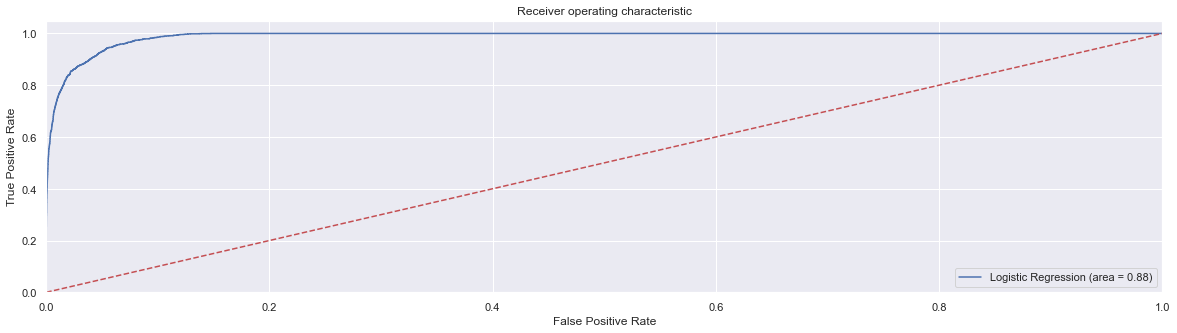

In [319]:
#plotting a graph to show the receiver operating characteristic which displays the effectiveness of the logistic regressor on the data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The graph above displays the effectiveness of the logistic regressor on the data. The red line displays a linear regression. The blue line displays the modelling of the logistic regressor against the model data. An ideal scenario would show the blue line as deviated as possible from the red line. This plot shows that the model was successful as it is clear the blue line deviates quite significantly from the linear regression line, inidcating an accurate fit.

Logistic regression is a classification algorithm used to find the probability of event success and event failure. It supports categorizing data into discrete classes by studying the relationship from a given set of labelled data (Rout, 2020).

The assumptions of this model are as follows (Li, 2017):
- Binary logistic regression requires the dependent variable to be binary.
- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
- Only the meaningful variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regression requires quite large sample sizes.

<u>Advantages</u>
   1. Easy to implement, interpret, and very efficient to train.
   2. Less inclined to over-fitting but it can overfit in high dimensional datasets.
   3. Predicts directions of association (positive or negative correlation).
    
<u>Dissdvantages</u>
   1. Model is constructed on linear boundaries.
   2. There is an underlying assumption of linearilty between the dependent variable and independent variables, therefore, logistic regression requires average or no multicollinearity between independent variables.

<b>2. Decision Tree Classifier

In [332]:
#fitting the model and displaying output statistics
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)
y_predDT = regressor.predict(X_test)

accDT = metrics.accuracy_score(y_test, y_predDT)
DTmse = metrics.mean_squared_error(y_test, y_predDT)
DTrmse = np.sqrt(DTmse)

print('MSE:', DTmse, "RMSE:", DTrmse)

MSE: 0.0218 RMSE: 0.147648230602334


In [333]:
print("Single Tree Accuracy:", accDT)
print()

df_DT = pd.DataFrame({'Actual':y_test, 'Predicted':y_predDT})
df_DT['Predicted'] = df_DT['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_DT = df_DT.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_DT['Result'] = results 
df_DT = df_DT[["Result","Actual","Predicted","Count"]]
df_DT.head()

Single Tree Accuracy: 0.9782



,Result,Actual,Predicted,Count
0,True Negative,0,0,27494
1,False Positive,0,1,351
2,False Negative,1,0,303
3,True Positive,1,1,1852


This model uses a decision tree classifier to predict the fraud outcome. Decision trees are predictive models that use a set of binary rules to calculate a target value. Each tree consists of branches, leaves, and nodes that ultimately determine the output given a set of inputs. The features are the input values of the model, 30% of which are used for the testing against and the remaining 70% as training data for the model.

The model functions by asking a set of questions to eventually reach a prediction. During the training phase the model will take data (70% of the feature data provided) and map each case against the output (Fraud). This allows the model to learn and pick up the relationships between the data and the target variable. During the testing phase, a test set of data is given to the model (30% of the feature data) and a prediction of the target variable is made based on the outcome of the training data.

<u>Advantages</u>
1. Particularly useful in predicting non linear relationship between data
2. Can be used to predict the outcome of both numerical and categorical variables i.e. no data type constaints
3. The data is less influenced by outliers due to the nature of the True/False decision process the predictive model uses
4. One of the fastest ways to identify significant variables and build a predictive model given a dataset

<u>Disadvantages</u>
1. Overfitting of the training dataset - less accurate at predicting testing datasets
2. Cannot be used for extrapolation due to the nature of the feature and target variables
3. The predictive model can be heavily skewed with small variations in the data, especially if there are no strong correlations between data
4. Unable to make accurate predictions if the data provided is unrelated

<b>3. Bagging Classifier

In [298]:
#fitting the model and displaying output statistics
from sklearn.ensemble import BaggingClassifier

N = 50

model = BaggingClassifier(n_estimators=N, random_state=0)
model.fit(X_train, y_train)
y_pred_bag = model.predict(X_test)

acc_bag = metrics.accuracy_score(y_test, y_pred_bag)
BAGmse = metrics.mean_squared_error(y_test, y_pred_bag)
BAGrmse = np.sqrt(BAGmse)

print('MSE:', BAGmse, "RMSE:", BAGrmse)

MSE: 0.014133333333333333 RMSE: 0.11888369666751339


In [299]:
print("Bagging", N, "-Tree Accuracy:", acc_bag)
print()

df_BAG = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_bag})
df_BAG['Predicted'] = df_BAG['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_BAG = df_BAG.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_BAG['Result'] = results 
df_BAG = df_BAG[["Result","Actual","Predicted","Count"]]
df_BAG.head()

Bagging 50 -Tree Accuracy: 0.9858666666666667



,Result,Actual,Predicted,Count
0,True Negative,0,0,27766
1,False Positive,0,1,79
2,False Negative,1,0,345
3,True Positive,1,1,1810


The Bagging Classifier algorithm makes use of both regression and statistical classification (CFI, 2021). Bagging is composed of two parts: aggregation and bootstrapping. Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. The learning algorithm is then run on the samples selected. Model predictions undergo aggregation to combine them for the final prediction to consider all the outcomes possible.

<u>Advantages</u>
1. Combines weaker classifiers together to form one strong algorithm.
2. Reduces variance and prevents overfitting.

<u>Disadvantages</u>
1. Loss of interpretability of a model, leading to the possibility of high bias.

<b>4. Random Forest Classifier

In [440]:
#fitting the model and displaying output statistics
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_RFC = model.predict(X_test)

acc_RFC = metrics.accuracy_score(y_test, y_pred_RFC)
RFCmse = metrics.mean_squared_error(y_test, y_pred_RFC)
RFCrmse = np.sqrt(RFCmse)

print('MSE:', RFCmse, "RMSE:", RFCrmse)

C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 0.0153 RMSE: 0.12369316876852982


In [441]:
print("Random Forest Classifier Accuracy:", acc_RFC)
print()

df_RFC = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_RFC})
df_RFC['Predicted'] = df_RFC['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_RFC = df_RFC.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_RFC['Result'] = results 
df_RFC = df_RFC[["Result","Actual","Predicted","Count"]]
df_RFC.head()

Random Forest Classifier Accuracy: 0.9847



,Result,Actual,Predicted,Count
0,True Negative,0,0,27755
1,False Positive,0,1,90
2,False Negative,1,0,369
3,True Positive,1,1,1786


The random forest classifier uses a larger number of individual decision trees that operate as an ensemble, each of which makes a prediction, and the class with the most votes becoming the final model prediction (Yiu, 2019). This classifier works on the basis of bagging (see Bagging Classifier).



<u>Advantages</u> (Kumar, 2019)
1. Based on the bagging algorithm and uses ensemble learning.
2. Random Forest works well with both categorical and continuous variables.
3. Random Forest is usually robust to outliers and can handle them automatically.

<u>Disadvantages</u>
1. Requires more time and computational power to train.

<b>5. AdaBoost Classifier

In [302]:
#fitting the model and displaying output statistics
from sklearn.ensemble import AdaBoostClassifier

n_estimators = 50
learning_rate = 1

ada = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=1)
ada.fit(X_train, y_train)
y_pred_ADA = ada.predict(X_test)

acc_ADA = metrics.accuracy_score(y_test, y_pred_ADA)
ADAmse = metrics.mean_squared_error(y_test, y_pred_ADA)
ADArmse = np.sqrt(ADAmse)

print('MSE:', ADAmse, "RMSE:", ADArmse)

MSE: 0.016 RMSE: 0.12649110640673517


In [303]:
print("AdaBoost Accuracy:", acc_ADA)
print()

df_ADA = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_ADA})
df_ADA['Predicted'] = df_ADA['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_ADA = df_ADA.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_ADA['Result'] = results 
df_ADA = df_ADA[["Result","Actual","Predicted","Count"]]
df_ADA.head()

AdaBoost Accuracy: 0.984



,Result,Actual,Predicted,Count
0,True Negative,0,0,27647
1,False Positive,0,1,198
2,False Negative,1,0,282
3,True Positive,1,1,1873


The base functionality of Adaptive boosting (AdaBoost) lies in boosting (Sadki, 2021). Boosting is an algorithm aimed to ﬁt a meta-model (a model ﬁtted on the results of other models, usually called weak learners) on data in a greedy fashion - where more weight is given to the misclassiﬁed observation in earlier rounds of the algorithm. The weak learners can be any classiﬁcation or regression algorithm.

<u>Advantages</u>
1. Less susceptible to overfitting since it deals with weak learners.
2. Can converge weak learners to a strong learner, that will output that final model prediction.

<u>Disadvantages</u>
1. Very sensitive to noisy data and outliers, dataset must be cleared of outliers for optimal predictions.

<b>6. XGBoost Classifier

In [368]:
#fitting the model and displaying output statistics
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train,y_train)
ypredXGB = model.predict(X_test)

use_label_encoder=False

acc_xgb = metrics.accuracy_score(y_test,ypredXGB)
XGBmse = metrics.mean_squared_error(y_test, ypredXGB)
XGBrmse = np.sqrt(XGBmse)
print('MSE:',XGBmse,'RMSE:',XGBrmse)


C:\Users\Amin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MSE: 0.021766666666666667 RMSE: 0.1475353065088715


In [367]:
print('XGBoost Accuracy:', acc_xgb)

df_XGB = pd.DataFrame({'Actual':y_test, 'Predicted':ypredXGB})
df_XGB['Predicted'] = df_XGB['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_XGB = df_XGB.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_XGB['Result'] = results 
df_XGB = df_XGB[["Result","Actual","Predicted","Count"]]
df_XGB.head()

XGBoost Accuracy: 0.9782333333333333


,Result,Actual,Predicted,Count
0,True Negative,0,0,27506
1,False Positive,0,1,339
2,False Negative,1,0,314
3,True Positive,1,1,1841


In similar fashion to AdaBoost, Extreme Gradient Boosting (XGBoost) makes use of the boosting functionality. The foundation of XGBoost is to increase the speed and performance of gradient boosting algorithms (Sadki, 2021). It uses trees as weak learners and optimises the weak-learners construction to make algorithm memory and speed efficient.

<u>Advantages</u>
1. More efficient than other boosting algorithms by speed and memory.
2. Highly scalable when it comes to larger datasets.
3. Parallelisation.

<u>Disadvantages</u>
1. Very sensitive to noisy data and outliers, dataset must be cleared of outliers for optimal predictions.

<b>7. Neural Network

In [246]:
#fitting the model and displaying output statistics
import tensorflow as tf

neurons = 64
epochs = 10

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(neurons, activation='relu'),
                             tf.keras.layers.Dense(neurons/2, activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs)
y_pred_NN = model.predict(X_test)

threshold = 0.5

y_pred_NN = model.predict(X_test)
y_pred_NN = y_pred_NN > threshold
y_pred_NN = y_pred_NN.flatten()

acc_NN = metrics.accuracy_score(y_test, y_pred_NN)


Epoch 1/10
2188/2188 [==============================] - 2s 614us/step - loss: 0.0752 - accuracy: 0.9185
Epoch 2/10
2188/2188 [==============================] - 1s 604us/step - loss: 0.0273 - accuracy: 0.9680
Epoch 3/10
2188/2188 [==============================] - 1s 607us/step - loss: 0.0255 - accuracy: 0.9708
Epoch 4/10
2188/2188 [==============================] - 1s 677us/step - loss: 0.0244 - accuracy: 0.9725
Epoch 5/10
2188/2188 [==============================] - 1s 600us/step - loss: 0.0245 - accuracy: 0.9720
Epoch 6/10
2188/2188 [==============================] - 1s 618us/step - loss: 0.0233 - accuracy: 0.9732
Epoch 7/10
2188/2188 [==============================] - 1s 666us/step - loss: 0.0172 - accuracy: 0.9794
Epoch 8/10
2188/2188 [==============================] - 1s 619us/step - loss: 0.0179 - accuracy: 0.9785
Epoch 9/10
2188/2188 [==============================] - 2s 687us/step - loss: 0.0166 - accuracy: 0.9798
Epoch 10/10
2188/2188 [==============================] - 1s 642u

In [396]:
NNmse = metrics.mean_squared_error(y_test, y_pred_NN)
NNrmse = np.sqrt(NNmse)
print('MSE:',NNmse,'RMSE:',NNrmse)

MSE: 0.019866666666666668 RMSE: 0.14094916341243982


In [247]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [248]:
print("Neural Network Accuracy:", acc_NN)
print()

df_NN = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_NN})
df_NN['Predicted'] = df_NN['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_NN = df_NN.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_NN['Result'] = results 
df_NN = df_NN[["Result","Actual","Predicted","Count"]]
df_NN.head()

Neural Network Accuracy: 0.9801333333333333



,Result,Actual,Predicted,Count
0,True Negative,0,0,27669
1,False Positive,0,1,176
2,False Negative,1,0,420
3,True Positive,1,1,1735


The Neural Network model works through a self-optimisation process of which makes use of backpropagation (Wilson, 2019). This process sees multiple iterations during the training process. Backpropagation is used to go back through the layers of the neural network and adjust the weights of the initial inputs according to their contribution to the neural network's error. The final output of the neural network is determined once the accuracy of the final output is equivalent to or smaller than that of the pervious iteration.

<u>Advantages</u>
1. Robust to noise and outliers in the training data.
2. Fast evaluation of the target function.

<u>Disadvantages</u>
1. Typically uses more computational power than other models.

## Model Analysis 

[]

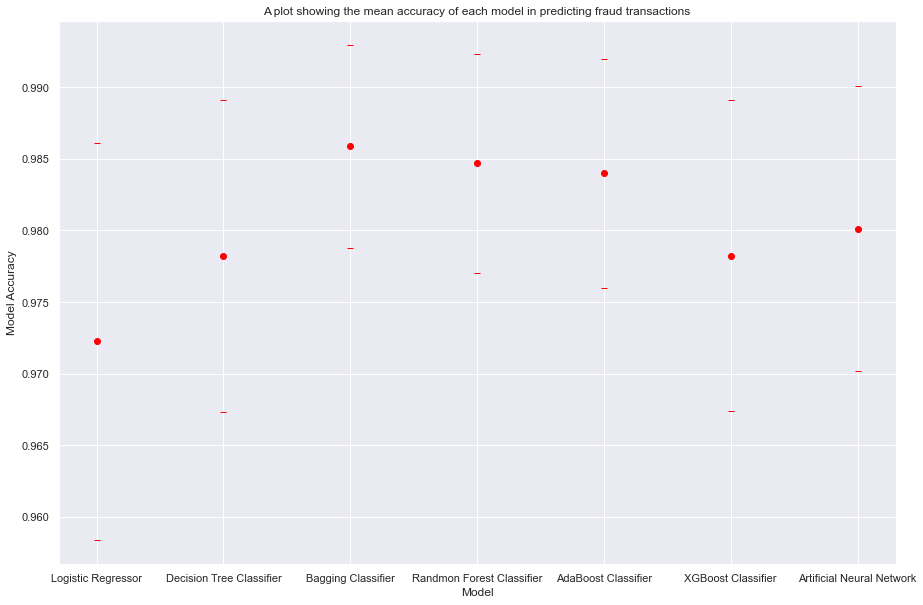

In [442]:
#plotting the accuracy of each model with the mean squared error

xmodel = ['Logistic Regressor','Decision Tree Classifier','Bagging Classifier','Randmon Forest Classifier','AdaBoost Classifier','XGBoost Classifier','Artificial Neural Network']
ymodel = [accLR,accDT,acc_bag, acc_RFC, acc_ADA,acc_xgb,acc_NN]

yer1= array([LRmse,DTmse,BAGmse, RFCmse, ADAmse,XGBmse,NNmse])
plt.subplots(figsize=(15,10))
plot(xmodel,ymodel,marker = 'o',linestyle='', color='red', )
plot(xmodel,ymodel+((1/2)*yer1), linestyle='', marker='_',color='red')
plot(xmodel,ymodel-((1/2)*yer1), linestyle='', marker='_',color='red')
title('A plot showing the mean accuracy of each model in predicting fraud transactions')
ylabel('Model Accuracy')
xlabel('Model')
plot()

Overall, each model displayed a fairly high accuracy (>0.95) with descrepancies between the accuracy of each model. Evidently the Bagging Classifier was the most successful in predicting fraudulent transactions based on prediction accuracy. This is accompanied by the Random forest classifer, which also makes use of the bagging functionality. This is likely due to the superior functionality of the bagging classifiers, whereby aggregation and bootstrapping are leveraged to determine an output from a combination of many predictive models.

The Boosting based classifiers and the neural network also displayed relatively high accuracies when compared to the regressor. The logitic regressor showed the lowest accuracy due to the inherent functionality of assuming linearly correlated feature variables to the target variable. The high mean squared error further confirms the lesser suitability of a regressor to a classification problem.

## Bibliography

Corporate Finance Institute. 2021. Bagging (Bootstrap Aggregation) - Overview, How It Works, Advantages. [online] Available at: <https://corporatefinanceinstitute.com/resources/knowledge/other/bagging-bootstrap-aggregation/> [Accessed 8 May 2021].

Kumar, N., 2019. Advantages and Disadvantages of Random Forest Algorithm in Machine Learning. [online] Theprofessionalspoint.blogspot.com. Available at: <http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-random.html#:~:text=1.,and%20therefore%20improves%20the%20accuracy.> [Accessed 8 May 2021].

Kurama, V., 2020. Introduction to Bagging and Ensemble Methods | Paperspace Blog. [online] Paperspace Blog. Available at: <https://blog.paperspace.com/bagging-ensemble-methods/#:~:text=Advantages%20and%20Disadvantages,-Let's%20discuss%20the&text=Bagging%20is%20a%20completely%20data,the%20performance%20of%20the%20algorithm.> [Accessed 8 May 2021].

Li, S., 2017. Building A Logistic Regression in Python, Step by Step. [online] Medium. Available at: <https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8> [Accessed 8 May 2021].

Rout, A., 2020. Advantages and Disadvantages of Logistic Regression - GeeksforGeeks. [online] GeeksforGeeks. Available at: <https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/> [Accessed 8 May 2021].

Sadki, N., 2020. Understand AdaBoost and Implement it Effectively. [online] OpenGenus IQ: Learn Computer Science. Available at: <https://iq.opengenus.org/adaboost/> [Accessed 8 May 2021].

Wilson, A., 2019. Inroduction to Neural Networks in Python. [online] Medium. Available at: <https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24> [Accessed 8 May 2021].

Yiu, T., 2019. Understanding Random Forest. [online] Medium. Available at: <https://towardsdatascience.com/understanding-random-forest-58381e0602d2> [Accessed 8 May 2021].